In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mplcyberpunk
import matplotlib

plt.style.use('cyberpunk')
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] ='AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [158]:
df1 = pd.read_csv("/Users/tastebread/Desktop/kaggle/archive/accidents_2005_to_2007.csv")
df2 = pd.read_csv("/Users/tastebread/Desktop/kaggle/archive/accidents_2009_to_2011.csv")
df3 = pd.read_csv("/Users/tastebread/Desktop/kaggle/archive/accidents_2012_to_2014.csv")

In [159]:
df4 = pd.concat([df1,df2])
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039453 entries, 0 to 469441
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1039453 non-null  object 
 1   Location_Easting_OSGR                        1039352 non-null  float64
 2   Location_Northing_OSGR                       1039352 non-null  float64
 3   Longitude                                    1039352 non-null  float64
 4   Latitude                                     1039352 non-null  float64
 5   Police_Force                                 1039453 non-null  int64  
 6   Accident_Severity                            1039453 non-null  int64  
 7   Number_of_Vehicles                           1039453 non-null  int64  
 8   Number_of_Casualties                         1039453 non-null  int64  
 9   Date                                         10

In [160]:
df = pd.concat([df4,df3])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [161]:
df.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [162]:
def missings_col(df):
    labels,values = list(),list()
    if df.isna().sum().sum() > 0:
        for col in df.columns:
            if df[col].isnull().sum():
                labels.append(col)
                values.append(df[col].isnull().sum() / len(df[col]) * 100)
        missings = pd.DataFrame({'Features':labels, 'MissingPercent':values}).sort_values(by='MissingPercent',ascending=False)
        return missings
    else:
        return False

missings_col(df)

,Features,MissingPercent
5,Junction_Detail,100.000000
6,Junction_Control,40.078117
14,LSOA_of_Accident_Location,7.195958
13,Did_Police_Officer_Attend_Scene_of_Accident,0.194263
10,Road_Surface_Conditions,0.130173
9,Weather_Conditions,0.008377
4,Time,0.007778
0,Location_Easting_OSGR,0.006715
1,Location_Northing_OSGR,0.006715
2,Longitude,0.006715


In [163]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [164]:
"""
현재 년도를 나타내는 Year가 object형식으로 되어있기 때문에 숫자형으로 바꿔줌
Date의 년/월/일 을 분할해서 컬럼으로 만들어 줄 예정
"""
print(df['Year'].value_counts())
print(df['Date'].value_counts())
print(df['Day_of_Week'].value_counts())

df['Month'] = pd.DatetimeIndex(df['Date']).month # 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼후 datetimeindex 자료형 생성
print(df['Month'].value_counts())

2005    198735
2006    189161
2007    182115
2012    179715
2009    163554
2010    154414
2011    151474
2014    146322
2013    138660
Name: Year, dtype: int64
21/10/2005    822
18/11/2005    787
29/09/2006    784
22/09/2006    780
07/12/2005    775
             ... 
25/12/2007    157
02/01/2011    146
25/12/2011    142
10/01/2010    130
25/12/2014    128
Name: Date, Length: 3286, dtype: int64
6    247137
5    226411
4    226359
3    224110
2    213748
7    201413
1    164972
Name: Day_of_Week, dtype: int64
11    132841
10    132342
7     130219
5     128758
9     128687
1     128002
6     127522
8     125689
3     122084
4     120355
12    118084
2     109567
Name: Month, dtype: int64


In [165]:
df_year = {}
years = ['2005','2006','2007','2008','2009','2010','2010','2011','2012','2013','2014']
for year in years:
    df_year[year] = df[df['Year']==int(year)]

print(df['Year'])

df_dow = {} #요일을 숫자로 변환
dow = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}

for key in dow:
    df_dow[dow[key]] = df[df['Day_of_Week']==key]

months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Ag',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

print(df['Month'])

0         2005
1         2005
2         2005
3         2005
4         2005
          ... 
464692    2014
464693    2014
464694    2014
464695    2014
464696    2014
Name: Year, Length: 1504150, dtype: int64
0          4
1          5
2          6
3          7
4         10
          ..
464692     7
464693    11
464694     9
464695    12
464696    12
Name: Month, Length: 1504150, dtype: int64


In [166]:
print("예전 : ",df_year['2007']['Month'].unique())
df_year['2007'] = df_year['2007'].sort_values('Month')
print("정렬후 : ", df_year['2007']['Month'].unique())

df.dtypes

예전 :  [ 5  2  8  3  9 10 12  1 11  6  7  4]
정렬후 :  [ 1  2  3  4  5  6  7  8  9 10 11 12]


Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [167]:
"""
교통사고에서 영향을 주는 것들은 무엇일까?

속도,날씨,도로표면,조명조건, 여러 특수조건들이 있을것이다
이 아래부터는 하나씩 비교해볼려고 한다

먼저 속도가 심각도에 얼마나 영향을 주는지 알아보려고한다

"""

'\n교통사고에서 영향을 주는 것들은 무엇일까?\n\n속도,날씨,도로표면,조명조건, 여러 특수조건들이 있을것이다\n이 아래부터는 하나씩 비교해볼려고 한다\n\n먼저 속도가 심각도에 얼마나 영향을 주는지 알아보려고한다\n\n'

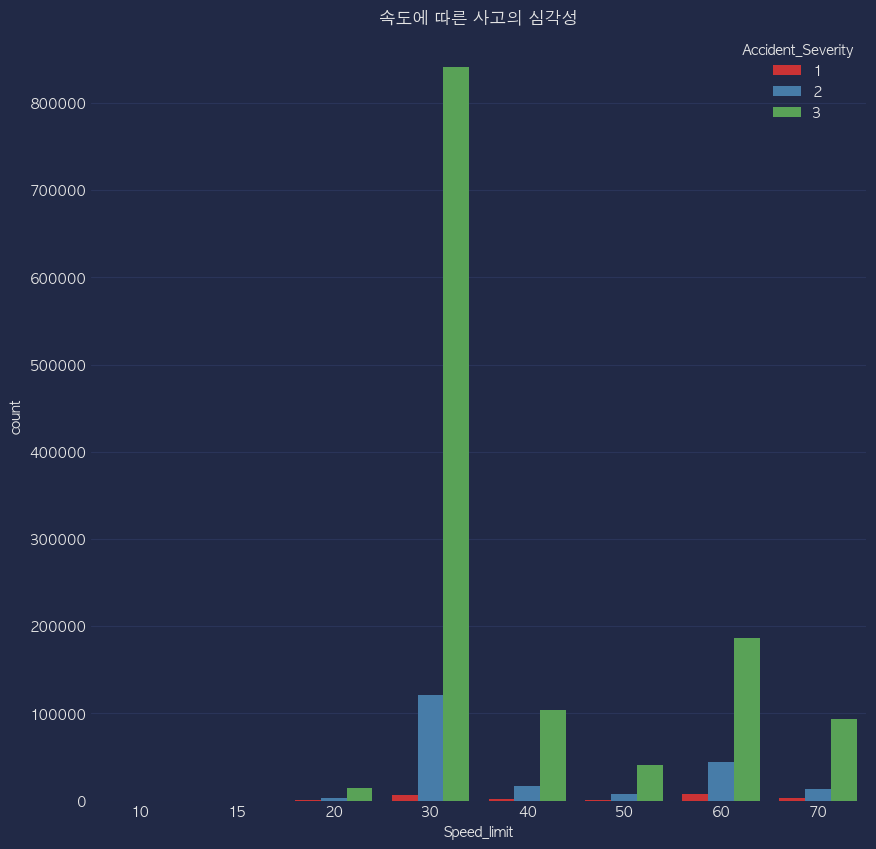

In [168]:
# 1. 속도에 따른 사고의 심각성을 시각화 해보기
# Accident_Severity 컬럼은 높은순으로 그 심각성을 나타낸다 1 : 높음 , 3 : 낮음

plt.figure(figsize=(10,10))
sns.countplot(x='Speed_limit',hue='Accident_Severity',data=df,palette='Set1')
plt.title("속도에 따른 사고의 심각성")
plt.show()

속도에 따른 사고의 심각성을 시각화 해본 결과 유의미한 결과를 얻어낼수는 없었다
1.속도가 높아질수록 심각성이 순차적으로 올라가면 유의미한 결과가 있겠지만 그렇지도 않다
2.속도가 30선에서 사고가 제일 많이 일어나는것다
3.속도가 빠르면 빠를수록 사고의심각도가 높아지는것은 아니다.

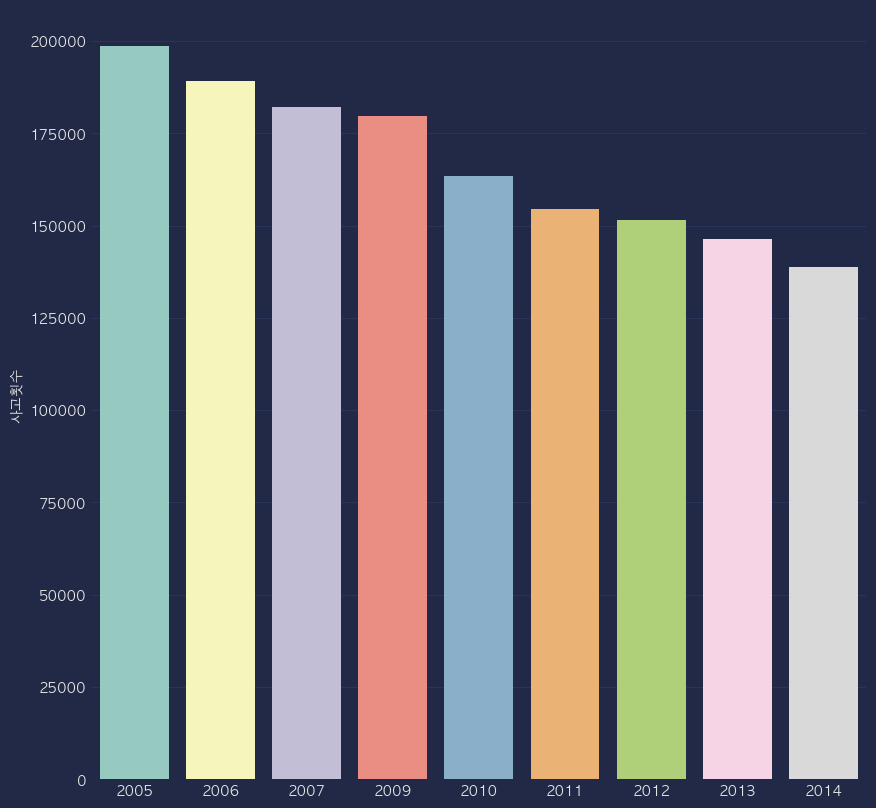

평균 사고 횟수 : 167127.78


In [169]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Year'].sort_values().unique(),y=df['Year'].value_counts(),palette='Set3')
plt.ylabel("사고횟수")
plt.show()

print("평균 사고 횟수 : {:.2f}".format(df['Year'].value_counts().mean()))

2005~2014까지의 사고횟수를 시각환 그래프이다
평균사고횟수는 약 16만건 정도이다

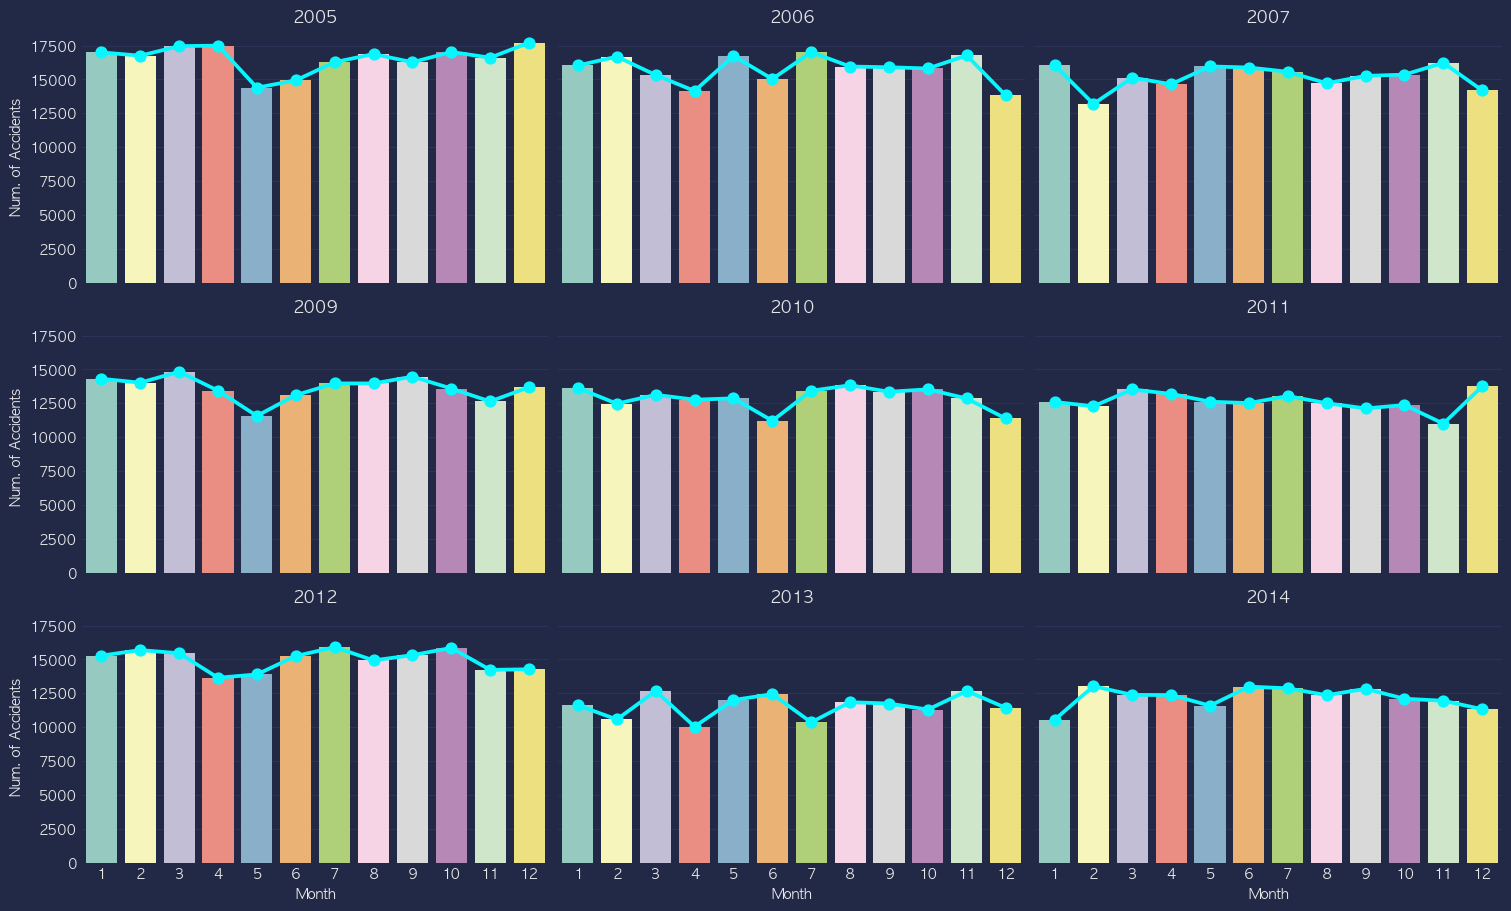

In [175]:
print(df_year[str(year)].groupby('Month')['Year'].count())

Month
1     10568
2     10039
3     10356
4     11298
5     11741
6     11612
7     12437
8     12003
9     11844
10    12665
11    12667
12    11430
Name: Year, dtype: int64
